# Gender determined by attribution type

A notebook that displays plots related to the gender of the author.

On processing the data files, a new ‘gender’ column which makes an educated guess of the gender of 
the author. The poems are categorized as: 

 * 'male'
 * 'female'
 * 'not attributed'
 * 'attributed (ambiguous)'
 
The first three are self-evident. The fourth refers to the fact that the poem has some form of 
attribution but we can’t tell if its male or female – no clear given name.

The poems in the following way:

First, I check the attribution type.

 * nan is 'not attributed'
 * m.d.e. or m.pseud are 'male'
 * f.d.e. or f.pseud are 'female'

For other attribution types, we then make an education guess based on the authorship details:

 * No data, it is is 'not attributed'
 * We can't determine a given and second name: 'attributed (ambiguous)'
 * First name are just initials with no prefix: 'attributed (ambiguous)'
 * Male prefixes, e.g. Dr., Mr. etc): ‘male’
 * Female prefixes, e.g. Mrs., Miss: ‘female’
 * Common female given name, e.g. Mary: ‘female’
 * If there is a reference to a maiden name (nee): ‘female’
* Anything else: ‘male’.

*Note:* This could be improved in a much more in a larger projects, checking given names against a 
database of female and male names. 

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [9]:
# install libraries
!pip install -r ../requirements.txt

# import libraries
import visualising_poetry.data as vpd
import visualising_poetry.plot as vpp
import visualising_poetry.widgets as vpw
import ipywidgets as widgets
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Gender across the dataset across all print years.

Display gender for all publications across all print/publication years. 

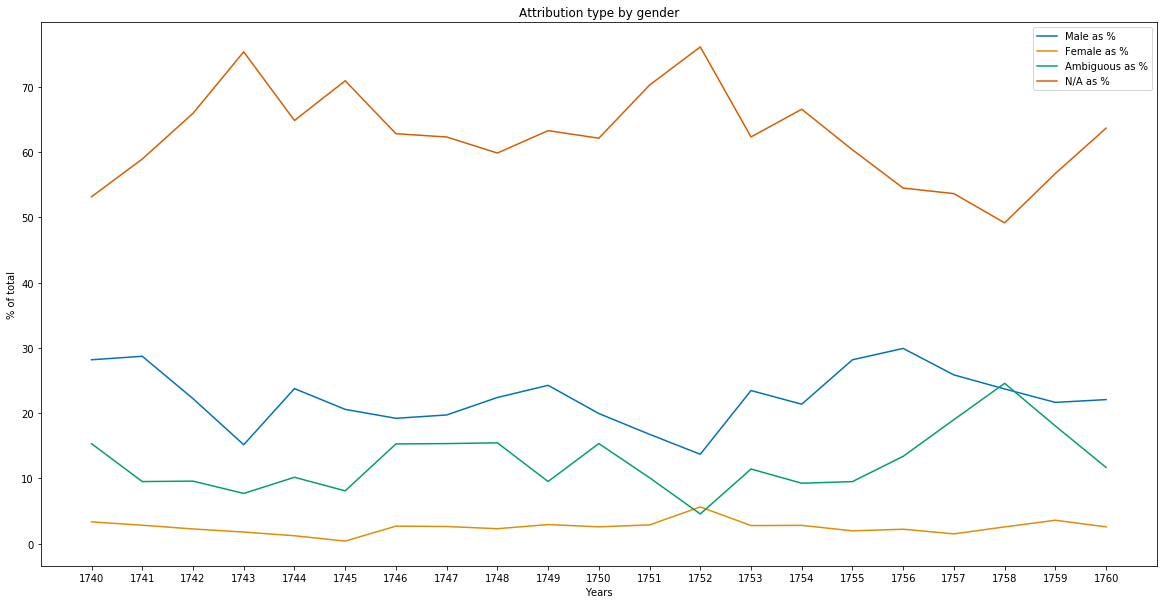

In [10]:
# generate the plot
gender = vpd.gender_overview_df(df)
vpp.gender_line_plot(gender)

## Gender by by journal

Display the plot for a selected publication.

In [11]:
# create the drop-down widget and button
pub_widget = vpw.publication_list_widget(df)
btn = widgets.Button(description='Generate Report')

# output for our widget
out = widgets.Output(layout={'border': '1px solid black'})

# method called to generate output
def on_button_pressed(button):
    out.clear_output()
    pub_df = df[df[vpd.PUB_TITLE] == pub_widget.value]
    pub_gender_df = vpd.gender_overview_df(pub_df)
    with out:
        vpp.gender_line_plot(pub_gender_df, '{}: attribution type by gender'.format(pub_widget.value))

btn.on_click(on_button_pressed)
display(pub_widget)
display(btn)
out



Select(description='Choose', options=('British Magazine', 'Common Sense', 'Craftsman', 'Daily Gazetteer', 'Dub…

Button(description='Generate Report', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))